In [ ]:
# module imports
import numpy as np 
import pandas as pd  
import math
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

In [ ]:
 # model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/KDDTest+.csv')
# train_df = pd.read_csv('NSL_KDD-master/NSL_KDD-master/KDDTrain+.csv')
# test_df = pd.read_csv('/content/drive/My Drive/KDDTestSmall.csv')
train_df = pd.read_csv('/content/drive/My Drive/KDDTrain+.csv')

In [ ]:
#column name
columns = ['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level']

In [ ]:
train_df.columns = columns
test_df.columns = columns

In [ ]:
df = pd.concat([train_df,test_df],axis = 0)
org_df = df.copy()

In [ ]:
print(df.shape)
print(train_df.shape)
print(test_df.shape)

(148514, 43)
(125972, 43)
(22542, 43)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148514 entries, 0 to 22541
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148514 non-null  int64  
 1   protocol_type                148514 non-null  object 
 2   service                      148514 non-null  object 
 3   flag                         148514 non-null  object 
 4   src_bytes                    148514 non-null  int64  
 5   dst_bytes                    148514 non-null  int64  
 6   land                         148514 non-null  int64  
 7   wrong_fragment               148514 non-null  int64  
 8   urgent                       148514 non-null  int64  
 9   hot                          148514 non-null  int64  
 10  num_failed_logins            148514 non-null  int64  
 11  logged_in                    148514 non-null  int64  
 12  num_compromised              148514 non-null  int64  
 13  

In [ ]:
#NaN values
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Binary Classification
# mapping a normal traffic as 0 and attack traffic to 1

df['attack'] = df.attack.map(lambda x: 0 if x == 'normal' else 1)

In [ ]:
# Data transformation and Processing
tooneencode = ['protocol_type']
tolabelencode = ['protocol_type','service', 'flag']
print("Protocol type: ",df['protocol_type'].unique())
print("service: ",df['service'].unique())
print("flag: ",df['flag'].unique())

Protocol type:  ['udp' 'tcp' 'icmp']
service:  ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
flag:  ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


In [ ]:
#Label Encoding
l = LabelEncoder()
for col in tolabelencode:
  df[col] = l.fit_transform(df[col])

In [ ]:
# feature Scaling
min_max = MinMaxScaler()
df = min_max.fit_transform(df)
df = pd.DataFrame(data = df,columns = columns)

In [ ]:
Y = df["attack"]
df.drop(["attack"],axis = 1,inplace = True)
df["attack"] = Y

In [ ]:
print(df.shape)
df.head()

(148514, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,attack
0,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0.714286,0.0
1,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0.904762,1.0
2,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1.000000,0.0
3,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.000000,0.0
4,0.0,0.5,0.710145,0.1,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1.000000,1.0


In [ ]:
#Feature Selection

X = df.iloc[:,0:42]
Y = df.iloc[:,42]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
print(featureScores.nlargest(17,'Score')) 

                       Specs         Score
11                 logged_in  39120.091168
38  dst_host_srv_serror_rate  38464.242550
25           srv_serror_rate  37455.977943
24               serror_rate  37343.880396
37      dst_host_serror_rate  37053.683895
32        dst_host_srv_count  28933.890852
33    dst_host_same_srv_rate  24863.064396
28             same_srv_rate  21135.120253
22                     count  13059.926399
26               rerror_rate  11209.071636
27           srv_rerror_rate  11208.215280
40  dst_host_srv_rerror_rate  10866.952603
39      dst_host_rerror_rate  10271.486113
3                       flag   6508.377513
31            dst_host_count   4287.431065
34    dst_host_diff_srv_rate   3982.730083
29             diff_srv_rate   3868.572335


In [ ]:
estimator = RandomForestClassifier(random_state=0)
estimator.fit(X,Y)

RandomForestClassifier(random_state=0)

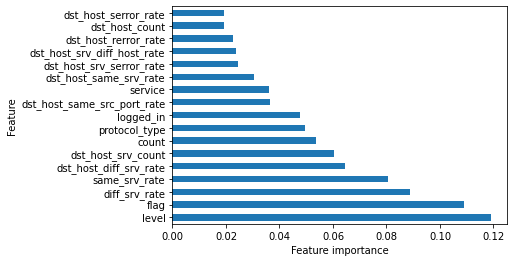

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(estimator.feature_importances_, index = X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
features = ["flag",
            "protocol_type",
            "service",
            "logged_in",
            "same_srv_rate",
            "diff_srv_rate",
            "level",
            "count"]

In [ ]:
_df = df[features]

In [ ]:
print(_df.shape)

(148514, 8)


In [ ]:
#One hot encoding all features
df_e = pd.get_dummies(org_df[tooneencode])

In [ ]:
_df = _df.drop(tooneencode,axis = 1)

In [ ]:
print(_df.shape)
print(df_e.shape)

(148514, 7)
(148514, 3)


In [ ]:
df_e.reset_index(inplace = True,drop = True)
_df = pd.concat([_df,df_e],axis = 1)
_df = _df.join(df['attack'])
_df['attack'] = _df['attack'].astype(int)

In [ ]:
n = 2000
normal_df = _df.loc[_df['attack']==0].iloc[:n]

In [ ]:
normal_idx = normal_df.index.tolist()
print(len(normal_idx))
normal_df.reset_index(drop = True,inplace = True)

In [ ]:
_df = _df.drop(normal_idx,axis = 0)
_df.reset_index(drop = True,inplace = True)
_df.head()

,flag,service,logged_in,same_srv_rate,diff_srv_rate,level,count,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,attack
0,0.5,0.710145,0.0,0.05,0.07,0.904762,0.240705,0,1,0,1
1,0.1,0.710145,0.0,0.16,0.06,1.000000,0.236791,0,1,0,1
2,0.5,0.710145,0.0,0.05,0.06,1.000000,0.324853,0,1,0,1
3,0.5,0.710145,0.0,0.14,0.06,1.000000,0.228963,0,1,0,1
4,0.5,0.739130,0.0,0.09,0.05,1.000000,0.528376,0,1,0,1


In [ ]:
n=2000
df_arr=[_df[i:i+n] for i in range(0,_df.shape[0],n)]

In [ ]:
len_df=len(df_arr)
print(len_df)

74


In [ ]:
testsize = 50
_frames=[]
for i in range(testsize):
    _frames.append(df_arr[i])
train_fr=pd.concat(_frames)


_frames.clear()
for i in range(testsize,len_df):
    _frames.append(df_arr[i])
test_fr=pd.concat(_frames)

In [ ]:
#Function to calculate Hellinger distance between two probability distributions
def hellinger(p, q):

  dis = math.sqrt(sum(
      [(math.sqrt(p_i) - math.sqrt(q_i))**2 for p_i, q_i in zip(p, q)]
      )/2)
  return dis

In [ ]:
##Function to get average probability distribution from a batch of probability distibutions 
def getProba(x_test, model, n):
  proba = model.predict_proba(x_test)
  t = [proba[0][0], proba[0][1]]
  for i in range(x_test.shape[0]):
    t[0]+=proba[i][0]
    t[1]+=proba[i][1]

  t[0]/=n
  t[1]/=n
  return t

In [ ]:
test_fr.reset_index(drop = True,inplace = True)

In [ ]:
print(test_fr.shape)
print(train_fr.shape)

(46514, 11)
(100000, 11)


In [ ]:
##Calculating Hellinger distance between the probability distribution of the training set and other batches
##input : model (Trained model on a classification ML algorithm)
##output : Hellinger distance between the training set and other remaining sets 
def hellingerForAll(normal_df,df,model,n) :
  m = normal_df.shape[1]
  model_proba = getProba(normal_df.iloc[:,0:m-1], model, n)

  cnt = len(df)
  dist = []
  for i in range(0, cnt):
    y_pred = getProba(df[i].iloc[:,0:m-1], model, n)
    dist.append(hellinger(model_proba, y_pred))
  return dist

In [ ]:
##Function to plot scatter plot 
##input : dist (A list containing the Hellinger distances of the different sets)
##        title (Title of Graph, a string)
def plotGraph(dist,df, title): 
  cnt = len(df)
  y = dist
  x = [i for i in range(0, cnt)]
  plt.scatter(x, y, label= "stars", color= "red",
              marker= "*", s=30)

  plt.xlabel('Batch number')
  plt.ylabel('Hellinger Distance')
  plt.title(title)
  plt.show()

In [ ]:
m = train_fr.shape[1]
x_train = train_fr.iloc[:,0:m-1]
y_train = train_fr.iloc[:,m-1]

x_test = test_fr.iloc[:,0:m-1]
y_test = test_fr.iloc[:,m-1]

In [ ]:
#Logistic Regression
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lr_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9241948660618309
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     22519
           1       0.94      0.91      0.93     23995

    accuracy                           0.92     46514
   macro avg       0.92      0.92      0.92     46514
weighted avg       0.92      0.92      0.92     46514



In [ ]:
hellinger_dist_lr = hellingerForAll(normal_df,df_arr[testsize:],lr_model,n)
hellinger_dist_lr

[0.35923707618490563,
 0.3669827980653847,
 0.36008404531539495,
 0.36249365282766266,
 0.35530034226347934,
 0.3496872011749842,
 0.34664898608458095,
 0.3587491411736462,
 0.3587689805901639,
 0.3746622505402566,
 0.3515178891566261,
 0.3625175813695002,
 0.38376141245492634,
 0.3921708163463976,
 0.3923608164173913,
 0.3879782565137726,
 0.3818733503064677,
 0.37058445234347465,
 0.3875674329479031,
 0.3838614161651807,
 0.3880947502954924,
 0.38790440731911674,
 0.38683089136381993,
 0.4444597676699957]

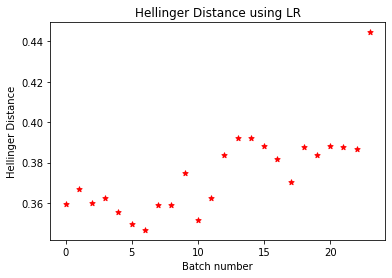

In [ ]:
##Plotting the calculated Hellinger distances
plotGraph(hellinger_dist_lr,df_arr[testsize:], 'Hellinger Distance using LR')

In [ ]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9222814636453541
              precision    recall  f1-score   support

           0       0.89      0.96      0.92     22519
           1       0.96      0.89      0.92     23995

    accuracy                           0.92     46514
   macro avg       0.92      0.92      0.92     46514
weighted avg       0.93      0.92      0.92     46514



In [ ]:
hellinger_dist_rf = hellingerForAll(normal_df,df_arr[testsize:],rf_model,n)
hellinger_dist_rf

[0.46614225867371595,
 0.47286739088639723,
 0.46469260935741585,
 0.4663251548544135,
 0.4574168798693999,
 0.4554022557049957,
 0.45199463886115104,
 0.458440120142694,
 0.46403278938684367,
 0.47458063835343184,
 0.4524864303538934,
 0.4669041861771934,
 0.4734559168603969,
 0.47497597968148364,
 0.48003522826252226,
 0.4727618845846008,
 0.4729443459291631,
 0.4542096131353868,
 0.47580070554606274,
 0.47390520000361863,
 0.4772315409050056,
 0.471258057747099,
 0.47019640012686825,
 0.48558714393341185]

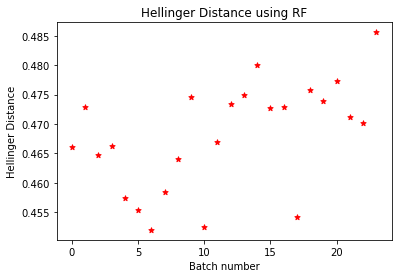

In [ ]:
##Plotting the calculated Hellinger distances
plotGraph(hellinger_dist_rf,df_arr[testsize:], 'Hellinger Distance using RF')

In [ ]:
#K Nearest Neighbour
knn_model = KNeighborsClassifier(n_neighbors = 10)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = knn_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9361052586318098
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     22519
           1       0.98      0.89      0.94     23995

    accuracy                           0.94     46514
   macro avg       0.94      0.94      0.94     46514
weighted avg       0.94      0.94      0.94     46514



In [ ]:
hellinger_dist_knn = hellingerForAll(normal_df,df_arr[testsize:],knn_model,n)
hellinger_dist_knn

[0.46596966700648473,
 0.47431357129343016,
 0.4651671104401318,
 0.4670727194189811,
 0.45796413976729683,
 0.45594943576402186,
 0.4530579636643475,
 0.4587358938011325,
 0.4640631231671871,
 0.4750465263234189,
 0.45369716441042374,
 0.46717297068363545,
 0.4655349844093621,
 0.46967786648524945,
 0.47281371858979643,
 0.46620369230305675,
 0.4645315487686541,
 0.4474298371164901,
 0.47117956026752583,
 0.4666382469837459,
 0.47091265888865586,
 0.46546810272163974,
 0.46376193953035105,
 0.48208604859623716]

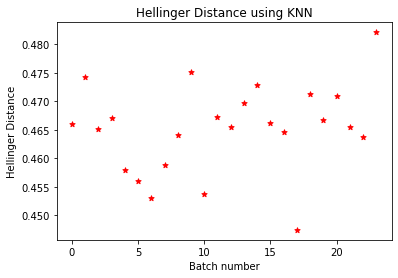

In [ ]:
##Plotting the calculated Hellinger distances
plotGraph(hellinger_dist_knn,df_arr[testsize:], 'Hellinger Distance using KNN')

In [ ]:
##Using Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8696091499333534
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     22519
           1       0.90      0.83      0.87     23995

    accuracy                           0.87     46514
   macro avg       0.87      0.87      0.87     46514
weighted avg       0.87      0.87      0.87     46514



In [ ]:
hellinger_dist_nb = hellingerForAll(normal_df,df_arr[testsize:],nb_model,n)
hellinger_dist_nb

[0.32290325554720045,
 0.33243378298246334,
 0.32636176057421773,
 0.32780786120820066,
 0.3193645608559747,
 0.3106829791281526,
 0.3065673624678727,
 0.3257208891483785,
 0.3174471763809238,
 0.33716592669634204,
 0.31564016645133836,
 0.3219210943409313,
 0.30765640447073334,
 0.31500152797876735,
 0.310443880920412,
 0.3081039521481743,
 0.30128431197917027,
 0.2881906463502445,
 0.30511656816634897,
 0.3001723167323515,
 0.3083155622123262,
 0.3058959639084911,
 0.30421060170964975,
 0.4109710260526097]

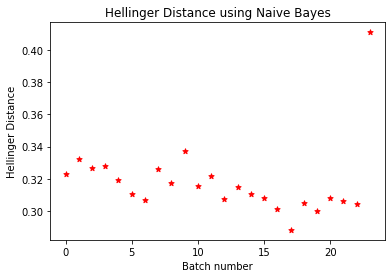

In [ ]:
plotGraph(hellinger_dist_nb,df_arr[testsize:], 'Hellinger Distance using Naive Bayes')

In [ ]:
# svm_model = svm.SVC(probability=True)
# svm_model.fit(x_train, y_train)

In [ ]:
# y_pred = svm_model.predict(x_test)
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [ ]:
# hellinger_dist_svm = hellingerForAll(normal_df,df_arr[testsize:],svm_model,n)
# hellinger_dist_svm

In [ ]:
# plotGraph(hellinger_dist_svm,df_arr[testsize:], 'Hellinger Distance using SVM')

#Threshold Calculation

Case 1: UL: mean (Mu)

In [ ]:
##Function to calculate the mean and standard deviation of a list of Hellinger distances
def uhl(dist):
  dist = np.array(dist)
  mean = np.mean(dist)
  stddev = np.std(dist)
  return mean,stddev

In [ ]:
##Function to plot the Hellinger distances along with thresholds
def plot(dist, mean, stddev, i, title):
  y = dist
  x = [i for i in range(1, len(dist)+1)]
  # plt.axhline(y = uhl, color = 'blue') ##Upper limit passed in function
  plt.axhline(y = mean + i*(stddev/2), color = 'green') ##Varying the threshold by adding standard deviation 
  # plt.axhline(y = uhl - stddev/2, color = 'yellow') ##Varying the threshold by subtracting standard deviation
  # plt.scatter(x, y, label= "stars", color= "red",
              # marker= ".", s=30)
  plt.plot(x, y)

  plt.xlabel('Batch number')
  plt.ylabel('Hellinger Distance')
  plt.title(title)
  plt.show()

In [ ]:
mean_lr, stddev_lr = uhl(hellinger_dist_lr)
mean_rf, stddev_rf = uhl(hellinger_dist_rf)
# mean_svm, stddev_svm = uhl(hellinger_dist_svm) 
mean_knn, stddev_knn = uhl(hellinger_dist_knn)
mean_nb, stddev_nb = uhl(hellinger_dist_nb)

In [ ]:
##Returns list of labels for all the frames
## 1 : attack, 0: normal
##input : hellinger_dis = list of the calculated Hellinger distances
##        mean = (mu) mean of the Hellinger distances 
##        stddev = standard deviation of the Hellinger distances
##        i = i for different cases {-1, 0, 1}

def list_of_labels(hellinger_dis, mean, stddev, i):
  uhl = mean + i * stddev/2
  l = []
  for i in range(0, len(hellinger_dis)):
    if hellinger_dis[i] <= uhl:
      l.append(0)
    else:
      l.append(1)

  return l

In [ ]:
test_list_lr =  list_of_labels(hellinger_dist_lr, mean_lr, stddev_lr, 0)
test_list_nb = list_of_labels(hellinger_dist_nb, mean_nb, stddev_nb, 0)
# test_list_svm = list_of_labels(hellinger_dist_svm, mean_svm, stddev_svm, 0)
test_list_knn = list_of_labels(hellinger_dist_knn, mean_knn, stddev_knn, 0)
test_list_rf = list_of_labels(hellinger_dist_rf, mean_rf, stddev_rf, 0)

In [ ]:
real = []
for i in range(testsize, len_df):
  if 1 in df_arr[i]['attack'].values:
    real.append(1)
  else:
    real.append(0)

In [ ]:
##Function to return the metrics
## tp : True Positive
## tn : True Negative
## fp : False Positive
## fn : False Negative

def give_metrics(real, predicted):
  tp, tn, fp, fn = 0, 0, 0, 0
  for i in range(0, len(predicted)):
    if(real[i] == 1 and real[i] == predicted[i]):
      tp+=1

    elif real[i] == 1 and predicted[i] == 0:
      fn+=1

    elif real[i] == 0 and predicted[i] == 1:
      fp+=1

    else:
      tn+=1

  return tp, tn, fp, fn


In [ ]:
##Function to calculate the evaluation metrics 
## Precision, Recall, Accuracy, F1 score

def checker(tp, tn, fp, fn):
  precision, recall, accuracy, f1 = 0, 0, 0, 0
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  f1 = (2*precision*recall)/(precision+recall)

  dic = {"precision" : precision, "recall" : recall, "accuracy" : accuracy, "f1_score" : f1}

  # print(precision," ", recall," ", accuracy," ", f1)
  return dic

In [ ]:
test_lists = [test_list_lr, test_list_nb, test_list_knn,test_list_rf]  #TODO: SVM

In [ ]:
# Case 1: Threshold Values
print("LR: ",mean_lr)
print("KNN: ",mean_knn)
print("NB: ",mean_nb)
# print("SVM: ",mean_svm)
print("RF: ",mean_rf)

LR:  0.3747540714537719
KNN:  0.465185353766719
NB:  0.31789081576713646
RF:  0.46806864038904855


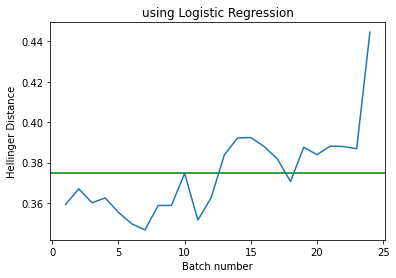

In [ ]:
plot(hellinger_dist_lr, mean_lr, stddev_lr, 0, "using Logistic Regression")

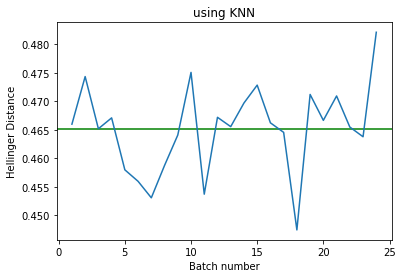

In [ ]:
plot(hellinger_dist_knn, mean_knn, stddev_knn, 0, "using KNN")

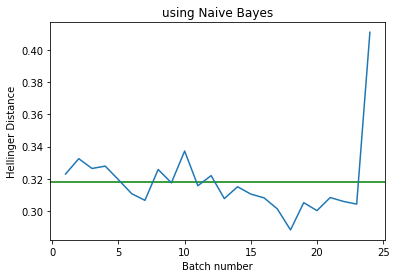

In [ ]:
plot(hellinger_dist_nb, mean_nb, stddev_nb, 0, "using Naive Bayes")

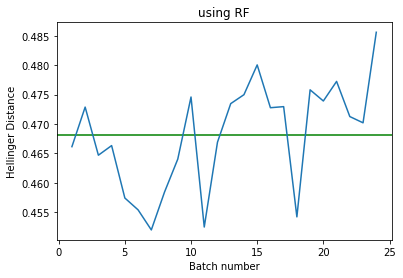

In [ ]:
plot(hellinger_dist_rf, mean_rf, stddev_rf, 0, "using RF")

In [ ]:
# plot(hellinger_dist_svm, mean_svm, stddev_svm, 0, "using SVM")

In [ ]:
##Function to return evaluation metrics for all the four algorithms in sequence : Logistic Regression, Naive Bayes, SVM, k Nearest Neighbor
## Returns a list of dictionary with precision, recall, accuracy and f1 score of all the algorithms
def total_metrics(test_lists):
  l = []

  for i in range(len(test_lists)):
    tp, tn, fp, fn = give_metrics(real, test_lists[i])
    temp = checker(tp, tn, fp, fn)
    l.append(temp)
  
  return l

In [ ]:
metrics_case_1 = total_metrics(test_lists) ##0 : logistic regression, 1 : naive bayes, 2 : k nearest neighbors, 3: RF
for dic in metrics_case_1:
  print(dic)

{'precision': 1.0, 'recall': 0.4583333333333333, 'accuracy': 0.4583333333333333, 'f1_score': 0.6285714285714286}
{'precision': 1.0, 'recall': 0.375, 'accuracy': 0.375, 'f1_score': 0.5454545454545454}
{'precision': 1.0, 'recall': 0.5833333333333334, 'accuracy': 0.5833333333333334, 'f1_score': 0.7368421052631579}
{'precision': 1.0, 'recall': 0.5416666666666666, 'accuracy': 0.5416666666666666, 'f1_score': 0.7027027027027027}


Case 2: UL = mean + stddev/2

In [ ]:
test_list_lr =  list_of_labels(hellinger_dist_lr, mean_lr, stddev_lr, 1)
test_list_nb = list_of_labels(hellinger_dist_nb, mean_nb, stddev_nb, 1)
# test_list_svm = list_of_labels(hellinger_dist_svm, mean_svm, stddev_svm, 1)
test_list_knn = list_of_labels(hellinger_dist_knn, mean_knn, stddev_knn,1)
test_list_rf = list_of_labels(hellinger_dist_rf, mean_rf, stddev_rf, 1)

In [ ]:
test_lists = [test_list_lr, test_list_nb, test_list_knn,test_list_rf]  #TODO: SVM

In [ ]:
# Case 2: Threshold Values
print("LR: ",mean_lr + stddev_lr/2)
print("KNN: ",mean_knn + stddev_knn/2)
print("NB: ",mean_nb + stddev_nb/2)
# print("SVM: ",mean_svm + stddev_svm/2)
print("RF: ",mean_rf + stddev_rf/2)

LR:  0.38506431929994184
KNN:  0.46900669344535223
NB:  0.32908483714370723
RF:  0.47254801749929587


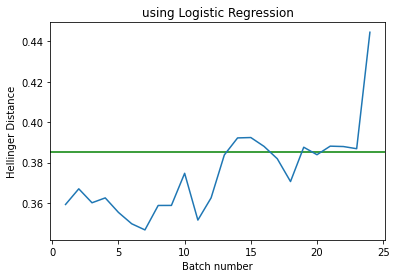

In [ ]:
plot(hellinger_dist_lr, mean_lr, stddev_lr, 1, "using Logistic Regression")

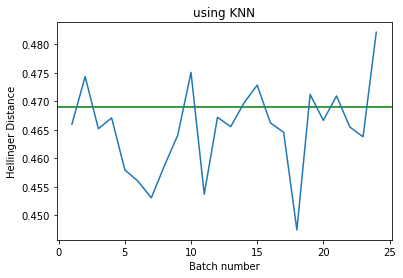

In [ ]:
plot(hellinger_dist_knn, mean_knn, stddev_knn, 1, "using KNN")

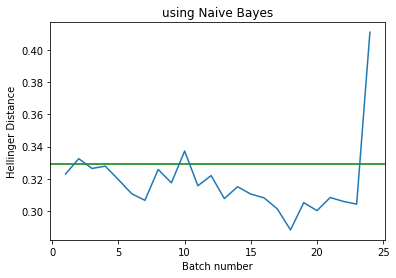

In [ ]:
plot(hellinger_dist_nb, mean_nb, stddev_nb, 1, "using Naive Bayes")

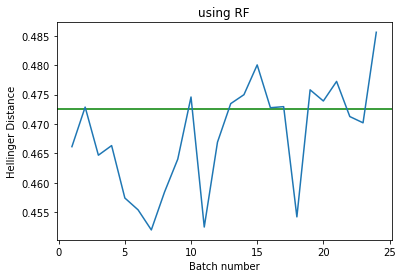

In [ ]:
plot(hellinger_dist_rf, mean_rf, stddev_rf, 1, "using RF")

In [ ]:
# plot(hellinger_dist_svm, mean_svm, stddev_svm, 1, "using SVM")

In [ ]:
metrics_case_2 = total_metrics(test_lists) ##0 : logistic regression, 1 : naive bayes, 2 : k nearest neighbors, 3: RF
for dic in metrics_case_2:
  print(dic)

{'precision': 1.0, 'recall': 0.3333333333333333, 'accuracy': 0.3333333333333333, 'f1_score': 0.5}
{'precision': 1.0, 'recall': 0.125, 'accuracy': 0.125, 'f1_score': 0.2222222222222222}
{'precision': 1.0, 'recall': 0.2916666666666667, 'accuracy': 0.2916666666666667, 'f1_score': 0.45161290322580644}
{'precision': 1.0, 'recall': 0.4583333333333333, 'accuracy': 0.4583333333333333, 'f1_score': 0.6285714285714286}


Case 3: UL = mean - stddev/2

In [ ]:
test_list_lr =  list_of_labels(hellinger_dist_lr, mean_lr, stddev_lr, -1)
test_list_nb = list_of_labels(hellinger_dist_nb, mean_nb, stddev_nb, -1)
# test_list_svm = list_of_labels(hellinger_dist_svm, mean_svm, stddev_svm, -1)
test_list_knn = list_of_labels(hellinger_dist_knn, mean_knn, stddev_knn,-1)
test_list_rf = list_of_labels(hellinger_dist_rf, mean_rf, stddev_rf, -1)

In [ ]:
test_lists = [test_list_lr, test_list_nb, test_list_knn,test_list_rf]  #TODO: SVM

In [ ]:
# Case 3: Threshold Values
print("LR: ",mean_lr - stddev_lr/2)
print("KNN: ",mean_knn - stddev_knn/2)
print("NB: ",mean_nb - stddev_nb/2)
# print("SVM: ",mean_svm - stddev_svm/2)
print("RF: ",mean_rf - stddev_rf/2)

LR:  0.3644438236076019
KNN:  0.46136401408808575
NB:  0.3066967943905657
RF:  0.46358926327880123


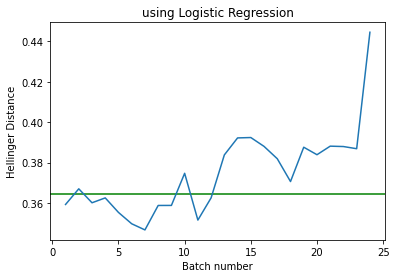

In [ ]:
plot(hellinger_dist_lr, mean_lr, stddev_lr, -1, "using Logistic Regression")

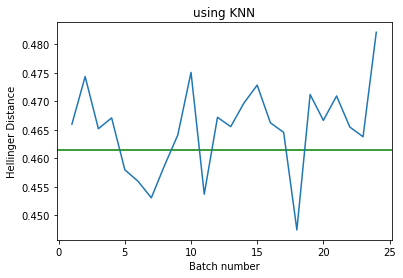

In [ ]:
plot(hellinger_dist_knn, mean_knn, stddev_knn, -1, "using KNN")

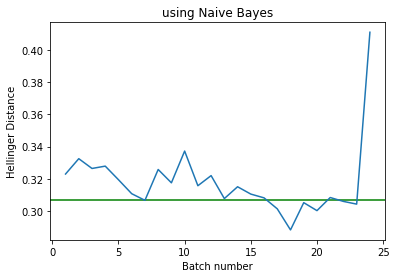

In [ ]:
plot(hellinger_dist_nb, mean_nb, stddev_nb, -1, "using Naive Bayes")

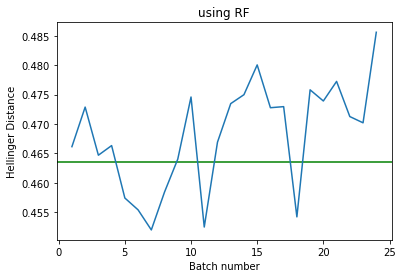

In [ ]:
plot(hellinger_dist_rf, mean_rf, stddev_rf, -1, "using RF")

In [ ]:
# plot(hellinger_dist_svm, mean_svm, stddev_svm, -1, "using SVM")

In [ ]:
metrics_case_3 = total_metrics(test_lists) ##0 : logistic regression, 1 : naive bayes, 2 : k nearest neighbors, 3: RF
for dic in metrics_case_3:
  print(dic)

{'precision': 1.0, 'recall': 0.5833333333333334, 'accuracy': 0.5833333333333334, 'f1_score': 0.7368421052631579}
{'precision': 1.0, 'recall': 0.7083333333333334, 'accuracy': 0.7083333333333334, 'f1_score': 0.8292682926829268}
{'precision': 1.0, 'recall': 0.75, 'accuracy': 0.75, 'f1_score': 0.8571428571428571}
{'precision': 1.0, 'recall': 0.75, 'accuracy': 0.75, 'f1_score': 0.8571428571428571}
